In [45]:
import pandas as pd 
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('data.csv')
print(df.shape)
df.head()

(2795, 48)


,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Report Number                         2795 non-null   int64  
 1   Supplemental Number                   2795 non-null   int64  
 2   Accident Year                         2795 non-null   int64  
 3   Accident Date/Time                    2795 non-null   object 
 4   Operator ID                           2795 non-null   int64  
 5   Operator Name                         2795 non-null   object 
 6   Pipeline/Facility Name                2674 non-null   object 
 7   Pipeline Location                     2795 non-null   object 
 8   Pipeline Type                         2777 non-null   object 
 9   Liquid Type                           2795 non-null   object 
 10  Liquid Subtype                        1349 non-null   object 
 11  Liquid Name      

In [4]:
df.isnull().sum()

Report Number                              0
Supplemental Number                        0
Accident Year                              0
Accident Date/Time                         0
Operator ID                                0
Operator Name                              0
Pipeline/Facility Name                   121
Pipeline Location                          0
Pipeline Type                             18
Liquid Type                                0
Liquid Subtype                          1446
Liquid Name                             2573
Accident City                            315
Accident County                           75
Accident State                            12
Accident Latitude                          0
Accident Longitude                         0
Cause Category                             0
Cause Subcategory                          0
Unintentional Release (Barrels)            0
Intentional Release (Barrels)           1586
Liquid Recovery (Barrels)                  0
Net Loss (

In [5]:
# Check for duplicates
sum(df['Report Number'].value_counts().values) == len(df)

True

In [6]:
# Remove Columns of more than 80% null values

# setting up the thredhold. We want at least 80% of our data to be non-null 
threshold = len(df)*0.80
print(threshold)

print(df.shape)
mine = df.dropna(thresh=threshold, axis=1, inplace=True)
print(df.shape)

2236.0
(2795, 48)
(2795, 31)


In [8]:
# removing useless columns for the analysis
df.drop(columns=['Report Number','Supplemental Number','Public Evacuations', 'Pipeline/Facility Name',
   'Property Damage Costs','Lost Commodity Costs','Public/Private Property Damage Costs',
   'Emergency Response Costs','Environmental Remediation Costs','Other Costs'], inplace=True)

# I am keeping these columns ('Accident Date/Time','Shutdown Date/Time','Restart Date/Time') 
# because I am curious if the cost is related to how long the plan/rig was shutdown 
# but turned out they were removed becuase they are mostly null :( 

df.head()

,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline Location,Pipeline Type,Liquid Type,Accident City,Accident County,Accident State,...,Accident Longitude,Cause Category,Cause Subcategory,Unintentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,All Costs
0,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",MCPHERSON,MCPHERSON,KS,...,-97.78123,INCORRECT OPERATION,PIPELINE/EQUIPMENT OVERPRESSURED,21.00,0.00,21.0,NO,NO,NO,1627
1,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,ONSHORE,ABOVEGROUND,CRUDE OIL,RAYMOND,CUMBERLAND,ME,...,-70.49336,MATERIAL/WELD/EQUIP FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,0.12,0.12,0.0,NO,NO,NaN,4008
2,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",SULPHER,CALCASIEU,LA,...,-93.35240,MATERIAL/WELD/EQUIP FAILURE,DEFECTIVE OR LOOSE TUBING/FITTING,2.00,0.00,2.0,NO,NO,NaN,200
3,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",ONSHORE,UNDERGROUND,CRUDE OIL,SUPERIOR,DOUGLAS,WI,...,-92.06120,NATURAL FORCE DAMAGE,TEMPERATURE,0.48,0.48,0.0,NO,NO,NaN,11540
4,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",ONSHORE,UNDERGROUND,CRUDE OIL,SHERMAN,GRAYSON,TX,...,-96.64881,EXCAVATION DAMAGE,THIRD PARTY EXCAVATION DAMAGE,700.00,698.00,2.0,NO,NO,NO,29650


In [9]:
df.isnull().sum()

Accident Year                        0
Accident Date/Time                   0
Operator ID                          0
Operator Name                        0
Pipeline Location                    0
Pipeline Type                       18
Liquid Type                          0
Accident City                      315
Accident County                     75
Accident State                      12
Accident Latitude                    0
Accident Longitude                   0
Cause Category                       0
Cause Subcategory                    0
Unintentional Release (Barrels)      0
Liquid Recovery (Barrels)            0
Net Loss (Barrels)                   0
Liquid Ignition                      0
Liquid Explosion                     0
Pipeline Shutdown                  212
All Costs                            0
dtype: int64

## Handle Missing Values

In [11]:
# 1) would be interested to see if the rows with missing 'Accident State' have values in 'Accident City' and 'Accident County'
# 2) would be intereste to see if shutting down in 'Pipeline Shutdown' is correlated to the cost 
# 3) 


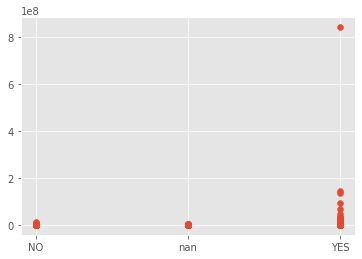

In [43]:
# Looking at 'Pipeline Shutdown' vs. 'All Costs'
plt.scatter(df['Pipeline Shutdown'].astype(str), df['All Costs'])
plt.show()

<AxesSubplot:xlabel='Pipeline Shutdown', ylabel='All Costs'>

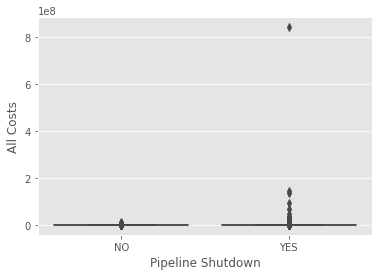

In [54]:
sns.boxplot(x='Pipeline Shutdown', y='All Costs', data=df)

<AxesSubplot:>

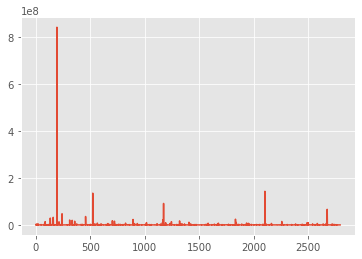

In [51]:
df['All Costs'].plot()

In [60]:
df[df['All Costs']>500000000]

,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline Location,Pipeline Type,Liquid Type,Accident City,Accident County,Accident State,...,Accident Longitude,Cause Category,Cause Subcategory,Unintentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,All Costs
194,2010,7/25/2010 5:58 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",ONSHORE,UNDERGROUND,CRUDE OIL,MARSHALL,CALHOUN,MI,...,-84.97251,MATERIAL/WELD/EQUIP FAILURE,ENVIRONMENTAL CRACKING-RELATED,20082.0,18245.0,1837.0,NO,NO,YES,840526118


In [65]:
df.drop([194], inplace=True)

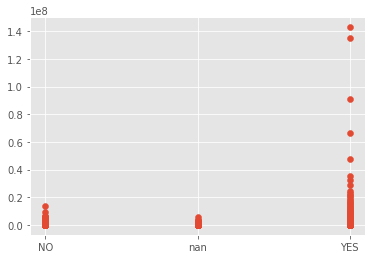

In [66]:
plt.scatter(df['Pipeline Shutdown'].astype(str), df['All Costs'])
plt.show()

<AxesSubplot:xlabel='Pipeline Shutdown', ylabel='All Costs'>

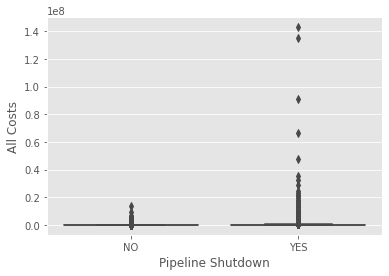

In [67]:
sns.boxplot(x='Pipeline Shutdown', y='All Costs', data=df)

In [ ]:
df['Operator ID'].plot(kind='bar')

<AxesSubplot:>